In [2]:
import sklearn
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import _BaseNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import OneClassSVM
import tensorflow as tf
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [3]:
data = pd.read_csv("/content/drive/MyDrive/heart_disease_health_indicators_BRFSS2015.csv")
label = "HeartDiseaseorAttack"
# data["male"] = data["Sex"].apply(lambda x: 1 if x == "male" else 0)
# data["female"] = data["Sex"].apply(lambda x: 1 if x == "female" else 0)
x = data.drop([label], axis=1)
y = data[label]
print(data.head())



   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3)

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = DecisionTreeClassifier()


In [7]:
scores = []
train_size = []
for i in np.arange(0.1 , 1.0 , 0.1):
  x_train_tmp, _, y_train_tmp, _ = sklearn.model_selection.train_test_split(x, y, test_size=i)
  model.fit(x_train_tmp , y_train_tmp)
  acc = model.score(x_test, y_test)
  scores.append(acc)
  train_size.append(x_train_tmp.shape[0])

In [8]:
x_train.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth',
       'DiffWalk', 'Sex', 'Age', 'Education', 'Income'],
      dtype='object')

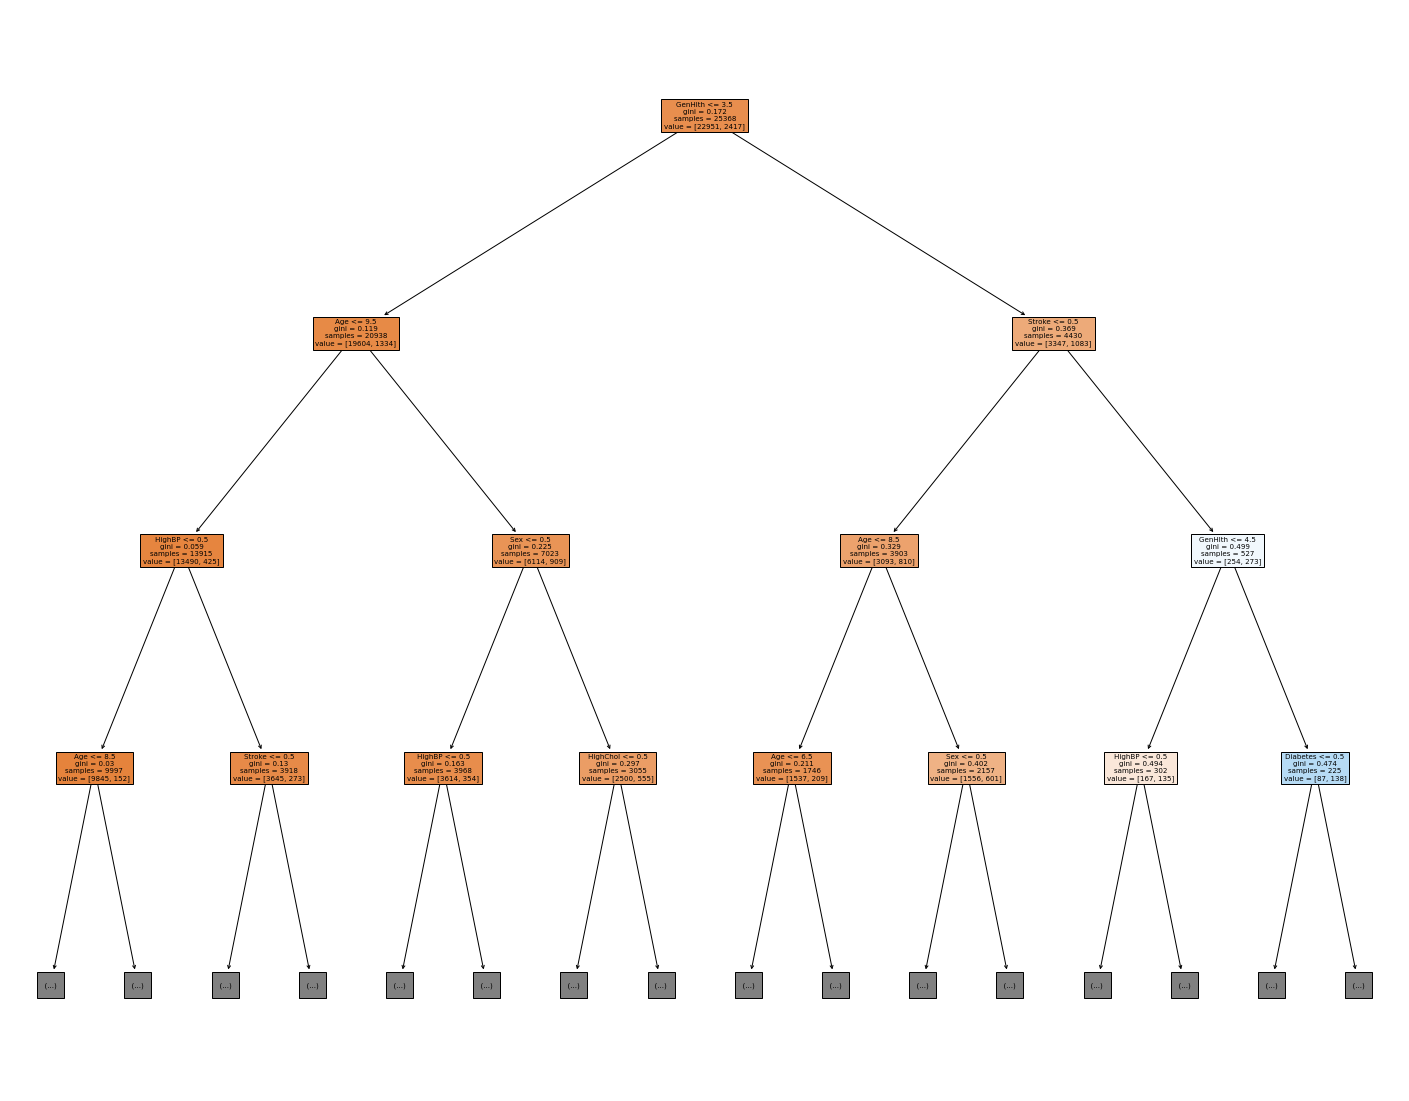

In [9]:
plt.figure(figsize=(25,20))
tree.plot_tree(model , max_depth=3 , feature_names=x_train.columns, filled=True)
plt.show()

In [10]:
from matplotlib.ticker import FuncFormatter
def k(x, pos):
    return '%1.1fK' % (x*1e-3)
formatter = FuncFormatter(k)

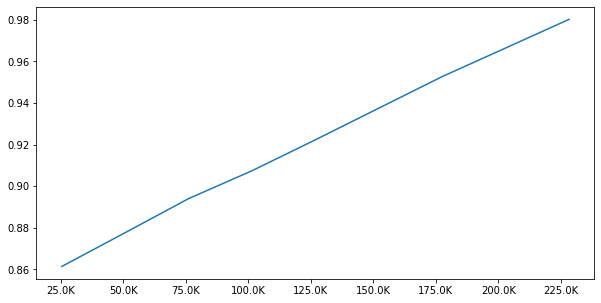

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_major_formatter(formatter)
plt.plot(train_size, scores)
plt.show()

In [12]:

y_pred = model.predict(x_test)
cm = confusion_matrix(y_test , y_pred)
cr = classification_report(y_test , y_pred)
print(acc)
print(cm)
print(cr)

0.8614264690423631
[[63056  5830]
 [ 4716  2502]]
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92     68886
         1.0       0.30      0.35      0.32      7218

    accuracy                           0.86     76104
   macro avg       0.62      0.63      0.62     76104
weighted avg       0.87      0.86      0.87     76104



In [13]:
model_ensembel = RandomForestClassifier()

In [14]:
model_ensembel.fit(x_train , y_train)
acc = model_ensembel.score(x_test, y_test)
print(acc)

0.9018054241564175


In [15]:
y_pred_ensembel = model_ensembel.predict(x_test)
cm_ensembel = confusion_matrix(y_test , y_pred_ensembel)
cr_ensembel = classification_report(y_test , y_pred_ensembel)
print(cm_ensembel)
print(cr_ensembel)

[[67862  1024]
 [ 6449   769]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     68886
         1.0       0.43      0.11      0.17      7218

    accuracy                           0.90     76104
   macro avg       0.67      0.55      0.56     76104
weighted avg       0.87      0.90      0.87     76104



In [16]:
model_knn = KNeighborsClassifier()

In [17]:
model_knn.fit(x_train , y_train)
acc = model_knn.score(x_test, y_test)
print(acc)

0.8948675496688742


In [18]:
y_pred_knn = model_knn.predict(x_test)
cm_knn = confusion_matrix(y_test , y_pred_knn)
cr_knn = classification_report(y_test , y_pred_knn)
print(cm_knn)
print(cr_knn)

[[67325  1561]
 [ 6440   778]]
              precision    recall  f1-score   support

         0.0       0.91      0.98      0.94     68886
         1.0       0.33      0.11      0.16      7218

    accuracy                           0.89     76104
   macro avg       0.62      0.54      0.55     76104
weighted avg       0.86      0.89      0.87     76104

